In [15]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt

from okama.assets import Asset, AssetList, Portfolio
from okama.frontier import EfficientFrontier, EfficientFrontierReb, Plots
from okama.helpers import Rebalance, Frame, Float

pd.options.display.float_format = '{:,.4f}'.format

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Развивающиеся страны и EAFE

In [30]:
l_full = ['SPY.US', 'EFA.US', 'IEMG.US']
ef_full = EfficientFrontierReb(l_full, n=5)
day = ef_full.first_date

In [4]:
l_iemg = ['SPY.US', 'EFA.US']
l_efa = ['SPY.US', 'IEMG.US']
l_spy = ['EFA.US', 'IEMG.US']

ef_iemg = EfficientFrontierReb(l_iemg, first_date = day)
ef_efa = EfficientFrontierReb(l_efa, first_date = day)
ef_spy = EfficientFrontierReb(l_spy, first_date = day)

In [27]:
ef_full.max_return['Risk_monthly']

0.040814236818821376

In [20]:
ef_full.gmv_monthly

(0.040522916913766874, 0.00590854828037549)

In [12]:
ef_full.gmv

(0.15044399340058498, 0.06217249295096283)

In [7]:
ef_full.gmv

(0.15044399340058498, 0.06217249295096283)

In [31]:
points_full = ef_full.ef_points

C:\Users\Sergey\Anaconda3\envs\py38\lib\site-packages\scipy\optimize\slsqp.py:63: RuntimeWarning: invalid value encountered in subtract
  jac[i] = (func(*((x0+dx,)+args)) - f0)/epsilon


KeyboardInterrupt: 

In [7]:
points_full

,Risk,CAGR,EFA.US,IEMG.US,SPY.US
0,0.1520,0.0741,0.1143,0.0365,0.8492
1,0.1524,0.0760,0.0933,0.0314,0.8753
2,0.1519,0.0715,0.0000,0.1507,0.8493
3,0.1516,0.0681,0.0000,0.1862,0.8138
4,0.1515,0.0663,0.0000,0.2061,0.7939
5,0.1514,0.0648,0.0000,0.2215,0.7785
6,0.1514,0.0636,0.0000,0.2346,0.7654
7,0.1513,0.0625,0.0000,0.2462,0.7538
8,0.1513,0.0615,0.0000,0.2567,0.7433
9,0.1513,0.0606,0.0000,0.2664,0.7336


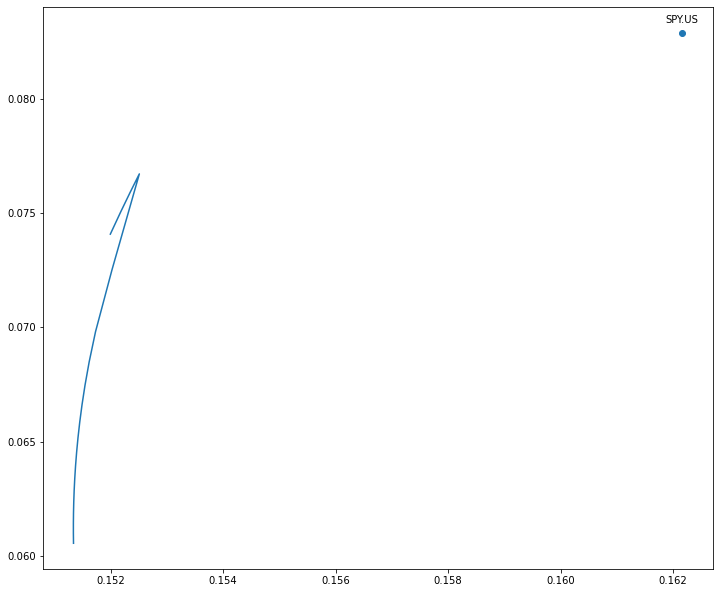

In [29]:
# Рef_pointsем границы
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
Plots(['SPY.US']).plot_assets(type='cagr')
ax = plt.gca()
ax.plot(points_full.Risk, points_full.CAGR)
# ax.plot(points_iemg.Risk, points_iemg.CAGR)
# ax.plot(points_efa.Risk, points_efa.CAGR)
# ax.plot(points_spy.Risk, points_spy.CAGR, color='green', marker='o', linestyle='dashed')

In [265]:
points_iemg = ef_iemg.ef_points
pef_fulls_efa = ef_efa.ef_points
points_spy = ef_spy.ef_points

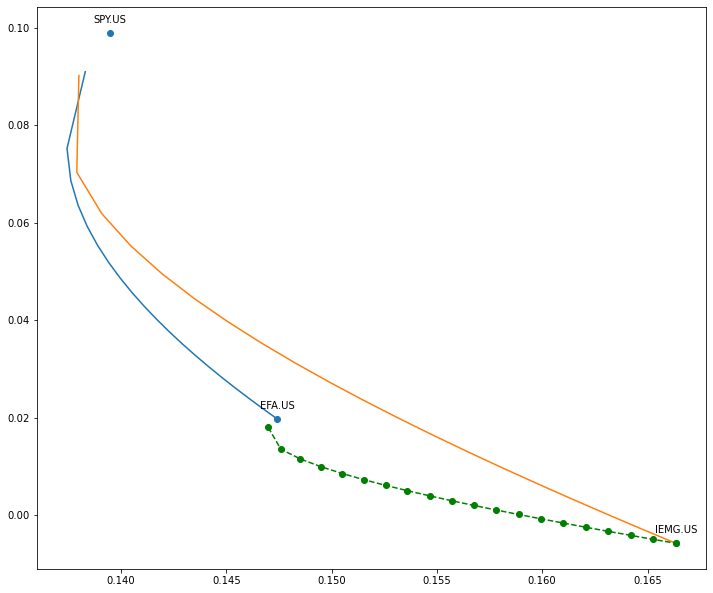

In [278]:
# Рef_pointsем границы
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
Plots(l_full).plot_assets(type='cagr')
ax = plt.gca()
# ax.plot(points_full.Risk, points_full.CAGR)
ax.plot(points_iemg.Risk, points_iemg.CAGR)
ax.plot(points_efa.Risk, points_efa.CAGR)
ax.plot(points_spy.Risk, points_spy.CAGR, color='green', marker='o', linestyle='dashed')

C:\Users\Sergey\OneDrive\NoteBooks\eod.py:551: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


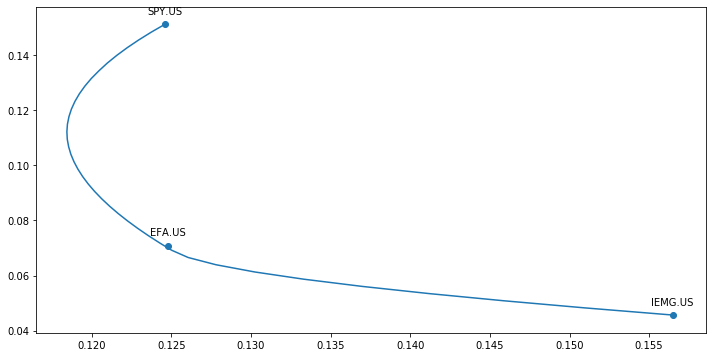

In [35]:
ef = eod.get_ef(40, assets_eafe)
fig = plt.figure(figsize=(12,6))
#fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.axes()
ax.plot(ef.Risk, ef.Return)

eod.plot_assets(assets_eafe)

#### Select return range (R > GMV)

In [32]:
criterion = ef_full.ror.mean() > ef_full.gmv_monthly[1]

In [33]:
criterion

SPY.US      True
EFA.US     False
IEMG.US    False
dtype: bool

In [36]:
ef_full.ror.loc[:,criterion].std().max()

0.040814236818821376

In [37]:
ef_full.gmv_monthly[0]

0.040522916913766874

#### END

In [182]:

ef.ef_points

,Risk,CAGR,EFA.US,IEMG.US,SPY.US
0,0.144,0.078,0.101,0.075,0.824
1,0.144,0.060,0.000,0.343,0.657
2,0.145,0.052,0.000,0.423,0.577
3,0.146,0.046,0.000,0.484,0.516
4,0.147,0.042,0.000,0.536,0.464
5,0.148,0.037,0.000,0.581,0.419
6,0.149,0.033,0.000,0.622,0.378
7,0.151,0.029,0.000,0.660,0.340
8,0.152,0.026,0.000,0.695,0.305
9,0.153,0.022,0.000,0.729,0.271


### EF for rebalanced portfolio

In [229]:
list = ['SPY.US', 'VNQ.US']
ef = EfficientFrontierReb(symbols=list, curr='RUB')
pl = Plots(list, curr='RUB')

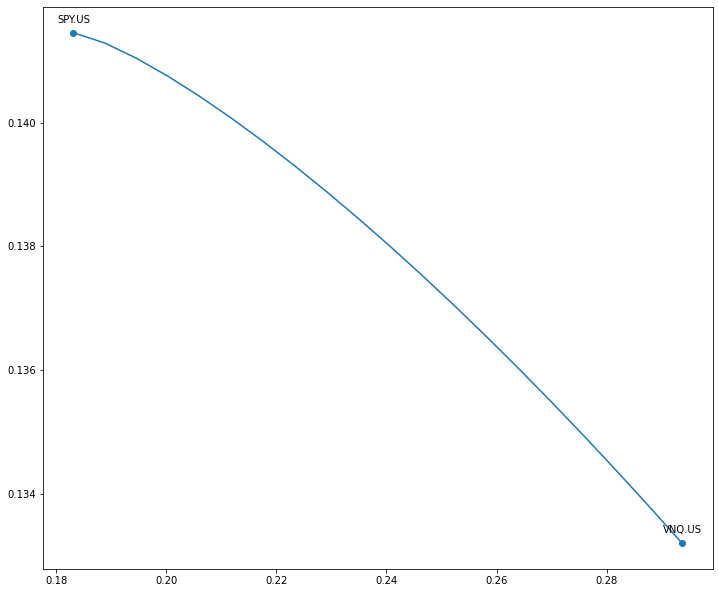

In [230]:
# Рисуем границы
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
pl.plot_assets(type='cagr')
ax = plt.gca()
ax.plot(ef.ef_points.Risk, ef.ef_points.CAGR)

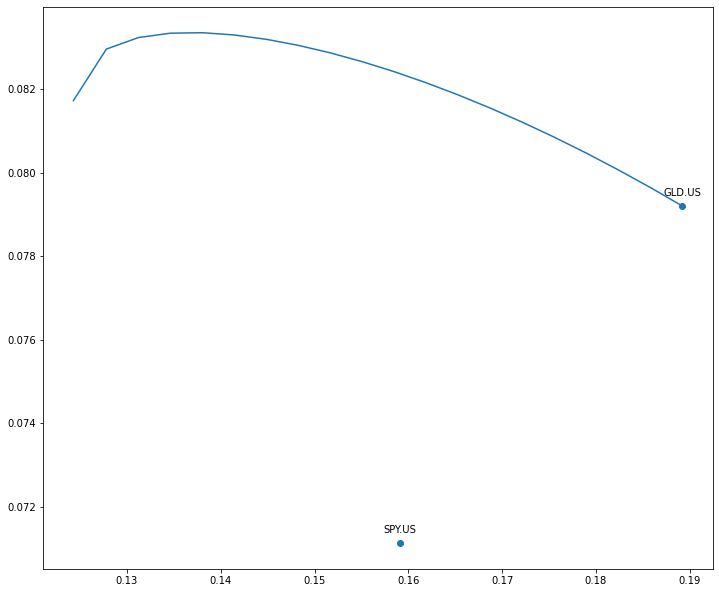

In [196]:
list = ['SPY.US', 'GLD.US']
ef = EfficientFrontierReb(symbols=list, curr='USD').ef_points
# Рисуем границы
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(bottom=0.2, top=1.5)
Plots(list, curr='USD').plot_assets(type='cagr')
ax = plt.gca()
ax.plot(ef.Risk, ef.CAGR)

In [118]:
l = ['SPY.US', 'GLD.US', '0890-94127385.RUFUND']

In [115]:
x = Plots(l, curr='RUB')

In [106]:
ef1 = EfficientFrontierReb(symbols=l, curr='RUB', period='Y')

In [107]:
ef2 = EfficientFrontierReb(symbols=l, curr='RUB', period='N')

In [108]:
df1 = ef1.ef_points

In [109]:
df2 = ef2.ef_points

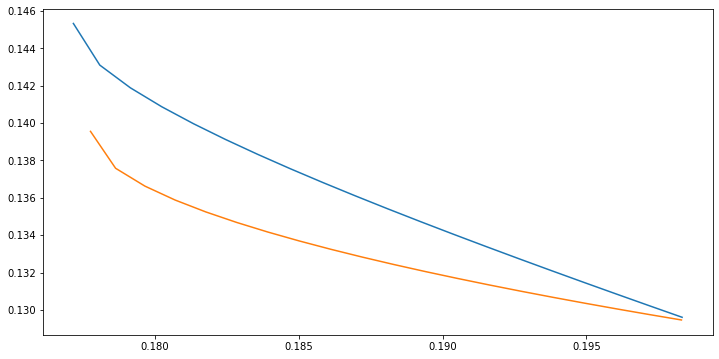

In [117]:
fig = plt.figure(figsize=(12,6))
#fig.subplots_adjust(bottom=0.2, top=1.5)

#ax.plot(df.Risk, df['Return (risk adjusted approx)'])
#ax.plot(df.Risk, df.Return)
x.plot_assets(type='cagr')
ax = plt.gca()
ax.plot(df1.Risk, df1.CAGR)
ax.plot(df2.Risk, df2.CAGR)


C:\Users\Sergey\OneDrive\NoteBooks\okama\frontier.py:298: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.autoscale(enable=True, axis='y', tight=False)


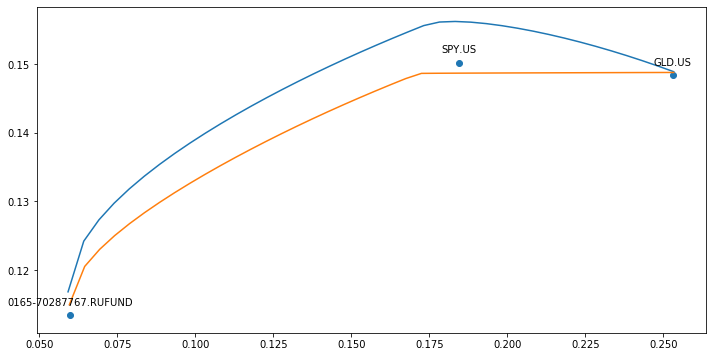

In [92]:
fig = plt.figure(figsize=(12,6))
#fig.subplots_adjust(bottom=0.2, top=1.5)
ax = plt.axes()
ax.plot(d.Risk, d.CAGR)
ax.plot(у.Risk, у.CAGR)
#ax.plot(df.Risk, df['Return (risk adjusted approx)'])
#ax.plot(df.Risk, df.Return)
x.plot_assets(type='cagr')